In [61]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem

In [62]:
estimator = "DR"
competition = "H"
agent_num = 15

In [63]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_H.json')

In [64]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  36%|███▋      | 5959/16384 [00:00<00:01, 7782.17it/s]


Stopping at Epoch 5959



DR 1: 100%|██████████| 32768/32768 [00:07<00:00, 4243.39it/s]


AUC predicting P(win):				 0.6692094895303874
Estimated Utility	 Mean Error:			 0.04374885026731824
Estimated Utility	 Mean Absolute Error:	 0.04527975879810404



Initialising Policy: 100%|██████████| 16384/16384 [00:12<00:00, 1283.23it/s]


Predicted mu Gammas:  tensor(0.9732, grad_fn=<MinBackward1>) tensor(1.0144, grad_fn=<MaxBackward1>) tensor(0.9997, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0423, grad_fn=<MinBackward1>) tensor(0.0702, grad_fn=<MaxBackward1>) tensor(0.0508, grad_fn=<MeanBackward0>)



DR 1:   5%|▍         | 1540/32768 [00:02<00:41, 747.30it/s]


Stopping at Epoch 1540
DR 1 Number of samples:  torch.Size([6586, 2])
DR 1 Predicted Gammas:  0.46886492 0.8366666 0.63236535
agent: 1




DR 2:  37%|███▋      | 6018/16384 [00:01<00:02, 5046.24it/s]


Stopping at Epoch 6018



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4321.59it/s]


AUC predicting P(win):				 0.8940458607247616
Estimated Utility	 Mean Error:			 0.2915222423743186
Estimated Utility	 Mean Absolute Error:	 0.29683020367717144



Initialising Policy:  79%|███████▉  | 13014/16384 [00:10<00:02, 1256.34it/s]


Stopping at Epoch 13014
Predicted mu Gammas:  tensor(0.9937, grad_fn=<MinBackward1>) tensor(1.0020, grad_fn=<MaxBackward1>) tensor(1.0002, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0367, grad_fn=<MinBackward1>) tensor(0.1319, grad_fn=<MaxBackward1>) tensor(0.0499, grad_fn=<MeanBackward0>)



DR 2:   8%|▊         | 2650/32768 [00:03<00:40, 735.09it/s]


Stopping at Epoch 2650
DR 2 Number of samples:  torch.Size([6730, 2])
DR 2 Predicted Gammas:  0.61557144 0.79531103 0.68706846
agent: 2




DR 3:  48%|████▊     | 7795/16384 [00:01<00:01, 5425.50it/s]


Stopping at Epoch 7795



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4337.69it/s]


AUC predicting P(win):				 0.82734583519999
Estimated Utility	 Mean Error:			 0.17771521201524154
Estimated Utility	 Mean Absolute Error:	 0.1818538945305843



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1258.77it/s]


Predicted mu Gammas:  tensor(0.9205, grad_fn=<MinBackward1>) tensor(1.0300, grad_fn=<MaxBackward1>) tensor(0.9988, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0392, grad_fn=<MinBackward1>) tensor(0.0933, grad_fn=<MaxBackward1>) tensor(0.0508, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 76/32768 [00:00<00:43, 758.45it/s]

Epoch 00113: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 227/32768 [00:00<00:46, 704.41it/s]

Epoch 00214: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 302/32768 [00:00<00:45, 719.57it/s]

Epoch 00315: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 456/32768 [00:00<00:43, 743.58it/s]

Epoch 00416: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 525/32768 [00:00<00:44, 729.89it/s]


Epoch 00517: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 525
DR 3 Number of samples:  torch.Size([6696, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
agent: 3




DR 4:  43%|████▎     | 6969/16384 [00:00<00:01, 7528.15it/s]


Stopping at Epoch 6969



DR 4: 100%|██████████| 32768/32768 [00:07<00:00, 4347.37it/s]


AUC predicting P(win):				 0.4807137291225594
Estimated Utility	 Mean Error:			 0.07335782225830136
Estimated Utility	 Mean Absolute Error:	 0.07537937708813146



Initialising Policy:  48%|████▊     | 7932/16384 [00:06<00:06, 1251.42it/s]


Stopping at Epoch 7932
Predicted mu Gammas:  tensor(0.9965, grad_fn=<MinBackward1>) tensor(1.0009, grad_fn=<MaxBackward1>) tensor(0.9996, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0391, grad_fn=<MinBackward1>) tensor(0.0915, grad_fn=<MaxBackward1>) tensor(0.0506, grad_fn=<MeanBackward0>)



DR 4:   5%|▍         | 1513/32768 [00:02<00:41, 744.55it/s]


Stopping at Epoch 1513
DR 4 Number of samples:  torch.Size([6676, 2])
DR 4 Predicted Gammas:  0.40842015 0.78259635 0.55971634
agent: 4




DR 5:  41%|████      | 6646/16384 [00:00<00:01, 8338.42it/s]


Stopping at Epoch 6646



DR 5: 100%|██████████| 32768/32768 [00:07<00:00, 4297.33it/s]


AUC predicting P(win):				 0.17284334939168772
Estimated Utility	 Mean Error:			 0.011534120761126844
Estimated Utility	 Mean Absolute Error:	 0.01184379543076762



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1254.16it/s]


Predicted mu Gammas:  tensor(0.9578, grad_fn=<MinBackward1>) tensor(1.0146, grad_fn=<MaxBackward1>) tensor(0.9994, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0497, grad_fn=<MinBackward1>) tensor(0.0602, grad_fn=<MaxBackward1>) tensor(0.0524, grad_fn=<MeanBackward0>)



DR 5:   3%|▎         | 961/32768 [00:01<00:42, 752.18it/s]


Stopping at Epoch 961
DR 5 Number of samples:  torch.Size([6694, 2])
DR 5 Predicted Gammas:  0.0 0.867743 0.36924016
agent: 5




DR 6:  45%|████▌     | 7399/16384 [00:01<00:02, 4312.83it/s]


Stopping at Epoch 7399



DR 6: 100%|██████████| 32768/32768 [00:07<00:00, 4340.31it/s]


AUC predicting P(win):				 0.926694827872942
Estimated Utility	 Mean Error:			 0.4835492334044907
Estimated Utility	 Mean Absolute Error:	 0.4922335147842488



Initialising Policy:  95%|█████████▍| 15555/16384 [00:12<00:00, 1277.23it/s]


Stopping at Epoch 15555
Predicted mu Gammas:  tensor(0.9897, grad_fn=<MinBackward1>) tensor(1.0034, grad_fn=<MaxBackward1>) tensor(0.9996, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0412, grad_fn=<MinBackward1>) tensor(0.0779, grad_fn=<MaxBackward1>) tensor(0.0504, grad_fn=<MeanBackward0>)



DR 6:  30%|██▉       | 9770/32768 [00:12<00:29, 775.97it/s]


Stopping at Epoch 9770
DR 6 Number of samples:  torch.Size([6570, 2])
DR 6 Predicted Gammas:  0.5848889 0.8608971 0.674726
agent: 6




DR 7:  44%|████▍     | 7217/16384 [00:01<00:01, 6369.38it/s]


Stopping at Epoch 7217



DR 7: 100%|██████████| 32768/32768 [00:07<00:00, 4335.99it/s]


AUC predicting P(win):				 0.7136027075158402
Estimated Utility	 Mean Error:			 0.10561995202488864
Estimated Utility	 Mean Absolute Error:	 0.10873847741248337



Initialising Policy: 100%|██████████| 16384/16384 [00:12<00:00, 1265.37it/s]


Predicted mu Gammas:  tensor(0.9957, grad_fn=<MinBackward1>) tensor(1.0087, grad_fn=<MaxBackward1>) tensor(1.0000, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0333, grad_fn=<MinBackward1>) tensor(0.1054, grad_fn=<MaxBackward1>) tensor(0.0494, grad_fn=<MeanBackward0>)



DR 7:   7%|▋         | 2222/32768 [00:02<00:40, 758.63it/s]


Stopping at Epoch 2222
DR 7 Number of samples:  torch.Size([6665, 2])
DR 7 Predicted Gammas:  0.5212406 0.85355854 0.6194448
agent: 7




DR 8:  36%|███▋      | 5941/16384 [00:00<00:01, 8261.06it/s]


Stopping at Epoch 5941



DR 8: 100%|██████████| 32768/32768 [00:07<00:00, 4326.44it/s]


AUC predicting P(win):				 0.42469901088531664
Estimated Utility	 Mean Error:			 0.015325473600277742
Estimated Utility	 Mean Absolute Error:	 0.017202692497284636



Initialising Policy:  83%|████████▎ | 13635/16384 [00:10<00:02, 1252.33it/s]


Stopping at Epoch 13635
Predicted mu Gammas:  tensor(0.9935, grad_fn=<MinBackward1>) tensor(1.0029, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0383, grad_fn=<MinBackward1>) tensor(0.0867, grad_fn=<MaxBackward1>) tensor(0.0507, grad_fn=<MeanBackward0>)



DR 8:   2%|▏         | 816/32768 [00:01<00:42, 746.21it/s]


Stopping at Epoch 816
DR 8 Number of samples:  torch.Size([6738, 2])
DR 8 Predicted Gammas:  0.28092474 0.8135443 0.52688664
agent: 8




DR 9:  44%|████▍     | 7265/16384 [00:02<00:02, 3054.61it/s]


Stopping at Epoch 7265



DR 9: 100%|██████████| 32768/32768 [00:07<00:00, 4153.38it/s]


AUC predicting P(win):				 0.9651675236869792
Estimated Utility	 Mean Error:			 0.7278277496175389
Estimated Utility	 Mean Absolute Error:	 0.733954506245337



Initialising Policy:  82%|████████▏ | 13470/16384 [00:10<00:02, 1256.04it/s]


Stopping at Epoch 13470
Predicted mu Gammas:  tensor(0.9969, grad_fn=<MinBackward1>) tensor(1.0008, grad_fn=<MaxBackward1>) tensor(1.0002, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0448, grad_fn=<MinBackward1>) tensor(0.0903, grad_fn=<MaxBackward1>) tensor(0.0507, grad_fn=<MeanBackward0>)



DR 9:  88%|████████▊ | 28950/32768 [00:37<00:04, 766.20it/s]


Stopping at Epoch 28950
DR 9 Number of samples:  torch.Size([6645, 2])
DR 9 Predicted Gammas:  0.6451894 1.0 0.78451365
number of iteration: 1

agent: 0




DR 1:  40%|███▉      | 6484/16384 [00:01<00:01, 5080.41it/s]


Stopping at Epoch 6484
AUC predicting P(win):				 0.7118000174301097
Estimated Utility	 Mean Error:			 0.1060711538342322
Estimated Utility	 Mean Absolute Error:	 0.1415478955215045



DR 1:  85%|████████▍ | 27770/32768 [00:06<00:01, 4270.42it/s]

Epoch 27306: reducing learning rate of group 0 to 6.0000e-04.
Epoch 27564: reducing learning rate of group 0 to 1.2000e-04.
Epoch 27821: reducing learning rate of group 0 to 2.4000e-05.
Epoch 28078: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  88%|████████▊ | 28682/32768 [00:06<00:00, 4252.03it/s]


Epoch 28335: reducing learning rate of group 0 to 9.6000e-07.
Epoch 28592: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 28682
AUC predicting P(win):				 0.7162095293773101
Estimated Utility	 Mean Error:			 0.17176243746927897
Estimated Utility	 Mean Absolute Error:	 0.20049032662103675



DR 1:   6%|▌         | 1890/32768 [00:02<00:41, 744.56it/s]


Stopping at Epoch 1890
DR 1 Number of samples:  torch.Size([6712, 2])
DR 1 Predicted Gammas:  0.42793563 0.5267527 0.4687195
agent: 1




DR 2:  42%|████▏     | 6846/16384 [00:00<00:01, 7241.84it/s]


Stopping at Epoch 6846
AUC predicting P(win):				 0.8210568767721641
Estimated Utility	 Mean Error:			 0.05157805913194192
Estimated Utility	 Mean Absolute Error:	 0.06281268969119844



DR 2:  76%|███████▌  | 24960/32768 [00:05<00:01, 4365.15it/s]

Epoch 24391: reducing learning rate of group 0 to 6.0000e-04.
Epoch 24674: reducing learning rate of group 0 to 1.2000e-04.
Epoch 24931: reducing learning rate of group 0 to 2.4000e-05.
Epoch 25188: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  80%|███████▉  | 26082/32768 [00:05<00:01, 4357.40it/s]


Epoch 25445: reducing learning rate of group 0 to 9.6000e-07.
Epoch 25702: reducing learning rate of group 0 to 1.9200e-07.
Epoch 25959: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 26082
AUC predicting P(win):				 0.8281746942726138
Estimated Utility	 Mean Error:			 0.06254262776924505
Estimated Utility	 Mean Absolute Error:	 0.07186867161509876



DR 2:   9%|▉         | 3010/32768 [00:03<00:38, 770.40it/s]


Stopping at Epoch 3010
DR 2 Number of samples:  torch.Size([6612, 2])
DR 2 Predicted Gammas:  0.56208134 0.67135143 0.60811424
agent: 2




DR 3:  42%|████▏     | 6912/16384 [00:02<00:03, 3033.97it/s]


Stopping at Epoch 6912
AUC predicting P(win):				 0.9716323481959234
Estimated Utility	 Mean Error:			 0.4880039499981782
Estimated Utility	 Mean Absolute Error:	 0.5187287035793453



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4147.16it/s]


AUC predicting P(win):				 0.973616375674026
Estimated Utility	 Mean Error:			 0.4880039526596542
Estimated Utility	 Mean Absolute Error:	 0.5187287062408212



DR 3:   0%|          | 68/32768 [00:00<00:48, 674.46it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 212/32768 [00:00<00:45, 713.25it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 286/32768 [00:00<00:45, 719.96it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 434/32768 [00:00<00:45, 707.93it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 505/32768 [00:00<00:46, 701.32it/s]

Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.



DR 3:   2%|▏         | 653/32768 [00:00<00:44, 722.22it/s]

Epoch 00607: reducing learning rate of group 0 to 4.4800e-07.



DR 3:   2%|▏         | 727/32768 [00:01<00:44, 726.40it/s]

Epoch 00708: reducing learning rate of group 0 to 8.9600e-08.



DR 3:   2%|▏         | 800/32768 [00:01<00:44, 717.85it/s]

Epoch 00809: reducing learning rate of group 0 to 1.7920e-08.



DR 3:   4%|▍         | 1246/32768 [00:01<00:43, 722.08it/s]


Stopping at Epoch 1246
DR 3 Number of samples:  torch.Size([6691, 2])
DR 3 Predicted Gammas:  0.9612955 1.0 0.9999942
agent: 3




DR 4:  37%|███▋      | 6102/16384 [00:00<00:01, 8487.44it/s]


Stopping at Epoch 6102
AUC predicting P(win):				 0.5356021277959367
Estimated Utility	 Mean Error:			 0.009624585338327583
Estimated Utility	 Mean Absolute Error:	 0.01214016700819832



DR 4: 100%|██████████| 32768/32768 [00:07<00:00, 4332.57it/s]


AUC predicting P(win):				 0.7256190048922215
Estimated Utility	 Mean Error:			 0.0011588424716401761
Estimated Utility	 Mean Absolute Error:	 0.0037182142510334896



DR 4:   3%|▎         | 1126/32768 [00:01<00:41, 756.05it/s]


Stopping at Epoch 1126
DR 4 Number of samples:  torch.Size([6715, 2])
DR 4 Predicted Gammas:  0.5123738 0.68291235 0.5906487
agent: 4




DR 5: 100%|██████████| 16384/16384 [00:01<00:00, 8618.73it/s]


AUC predicting P(win):				 0.6433028428804564
Estimated Utility	 Mean Error:			 0.003180299495853476
Estimated Utility	 Mean Absolute Error:	 0.0033560350066976336



DR 5: 100%|██████████| 32768/32768 [00:07<00:00, 4330.82it/s]


AUC predicting P(win):				 0.855798900149481
Estimated Utility	 Mean Error:			 0.0013159902232791456
Estimated Utility	 Mean Absolute Error:	 0.0014916776457295751



DR 5:   1%|          | 302/32768 [00:00<00:42, 759.95it/s]

Epoch 00184: reducing learning rate of group 0 to 1.4000e-03.



DR 5:   1%|▏         | 454/32768 [00:00<00:43, 747.75it/s]

Epoch 00347: reducing learning rate of group 0 to 2.8000e-04.
Epoch 00448: reducing learning rate of group 0 to 5.6000e-05.



DR 5:   2%|▏         | 595/32768 [00:00<00:43, 744.67it/s]


Epoch 00549: reducing learning rate of group 0 to 1.1200e-05.
Stopping at Epoch 595
DR 5 Number of samples:  torch.Size([6640, 2])
DR 5 Predicted Gammas:  0.0854058 0.5496697 0.31849542
agent: 5




DR 6:  35%|███▌      | 5747/16384 [00:00<00:01, 7914.03it/s]


Stopping at Epoch 5747
AUC predicting P(win):				 0.8323291828446466
Estimated Utility	 Mean Error:			 0.028557622422393958
Estimated Utility	 Mean Absolute Error:	 0.03286084204664573



DR 6:  43%|████▎     | 14215/32768 [00:03<00:04, 4327.73it/s]

Epoch 13450: reducing learning rate of group 0 to 6.0000e-04.
Epoch 13751: reducing learning rate of group 0 to 1.2000e-04.
Epoch 14008: reducing learning rate of group 0 to 2.4000e-05.
Epoch 14265: reducing learning rate of group 0 to 4.8000e-06.



DR 6:  45%|████▍     | 14697/32768 [00:03<00:04, 4269.62it/s]


Epoch 14522: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 14697
AUC predicting P(win):				 0.8358722224701605
Estimated Utility	 Mean Error:			 0.028306602915692924
Estimated Utility	 Mean Absolute Error:	 0.03246441324212397



DR 6:   7%|▋         | 2398/32768 [00:03<00:39, 771.02it/s]


Stopping at Epoch 2398
DR 6 Number of samples:  torch.Size([6654, 2])
DR 6 Predicted Gammas:  0.5694479 0.70741427 0.6341271
agent: 6




DR 7:  31%|███▏      | 5130/16384 [00:00<00:01, 7942.75it/s]


Stopping at Epoch 5130
AUC predicting P(win):				 0.8139780164436308
Estimated Utility	 Mean Error:			 0.021401737480279272
Estimated Utility	 Mean Absolute Error:	 0.03461827911262116



DR 7:  99%|█████████▊| 32342/32768 [00:07<00:00, 4352.43it/s]

Epoch 31890: reducing learning rate of group 0 to 6.0000e-04.
Epoch 32163: reducing learning rate of group 0 to 1.2000e-04.
Epoch 32420: reducing learning rate of group 0 to 2.4000e-05.
Epoch 32677: reducing learning rate of group 0 to 4.8000e-06.


DR 7: 100%|██████████| 32768/32768 [00:07<00:00, 4347.02it/s]


AUC predicting P(win):				 0.8954264601537187
Estimated Utility	 Mean Error:			 0.023838400758522265
Estimated Utility	 Mean Absolute Error:	 0.034759720785250164



DR 7:   3%|▎         | 1011/32768 [00:01<00:41, 765.28it/s]

Epoch 00915: reducing learning rate of group 0 to 1.4000e-03.



DR 7:   4%|▍         | 1463/32768 [00:01<00:41, 763.35it/s]


Stopping at Epoch 1463
DR 7 Number of samples:  torch.Size([6650, 2])
DR 7 Predicted Gammas:  0.48550874 0.6658364 0.5635329
agent: 7




DR 8:  33%|███▎      | 5450/16384 [00:00<00:01, 8501.80it/s]


Stopping at Epoch 5450
AUC predicting P(win):				 0.2902123590982287
Estimated Utility	 Mean Error:			 0.002475280963604069
Estimated Utility	 Mean Absolute Error:	 0.007368902536910181



DR 8: 100%|██████████| 32768/32768 [00:07<00:00, 4363.65it/s]


AUC predicting P(win):				 0.9523802334943638
Estimated Utility	 Mean Error:			 0.00014541329944712654
Estimated Utility	 Mean Absolute Error:	 0.004902419179142712



DR 8:   3%|▎         | 1004/32768 [00:01<00:43, 737.40it/s][A


Stopping at Epoch 1004
DR 8 Number of samples:  torch.Size([6654, 2])
DR 8 Predicted Gammas:  0.5221782 0.77356595 0.6391976
agent: 8




DR 9:  33%|███▎      | 5362/16384 [00:01<00:03, 3541.31it/s]


Stopping at Epoch 5362
AUC predicting P(win):				 0.7806129769441413
Estimated Utility	 Mean Error:			 0.33262914761566303
Estimated Utility	 Mean Absolute Error:	 0.3610323718962291



DR 9: 100%|██████████| 32768/32768 [00:07<00:00, 4122.45it/s]


AUC predicting P(win):				 0.781331461007496
Estimated Utility	 Mean Error:			 0.37703766459420857
Estimated Utility	 Mean Absolute Error:	 0.39632728249373367



DR 9:   9%|▉         | 3053/32768 [00:03<00:38, 765.99it/s]


Stopping at Epoch 3053
DR 9 Number of samples:  torch.Size([6672, 2])
DR 9 Predicted Gammas:  0.6296614 1.0 0.8408599
number of iteration: 2

agent: 0




DR 1:  35%|███▍      | 5733/16384 [00:00<00:01, 5860.63it/s]


Stopping at Epoch 5733
AUC predicting P(win):				 0.6969491777489609
Estimated Utility	 Mean Error:			 0.04980500844516662
Estimated Utility	 Mean Absolute Error:	 0.09423192457528001



DR 1:  87%|████████▋ | 28382/32768 [00:06<00:01, 4281.31it/s]

Epoch 27530: reducing learning rate of group 0 to 6.0000e-04.
Epoch 27788: reducing learning rate of group 0 to 1.2000e-04.
Epoch 28045: reducing learning rate of group 0 to 2.4000e-05.
Epoch 28302: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  88%|████████▊ | 28839/32768 [00:06<00:00, 4269.56it/s]


Epoch 28559: reducing learning rate of group 0 to 9.6000e-07.
Epoch 28816: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 28839
AUC predicting P(win):				 0.6989821604765072
Estimated Utility	 Mean Error:			 0.12445017303388667
Estimated Utility	 Mean Absolute Error:	 0.16266582648606032



DR 1:   2%|▏         | 707/32768 [00:00<00:43, 734.36it/s]


Stopping at Epoch 707
DR 1 Number of samples:  torch.Size([6677, 2])
DR 1 Predicted Gammas:  0.3561626 0.50003433 0.39997727
agent: 1




DR 2:  41%|████      | 6651/16384 [00:01<00:02, 3722.82it/s]


Stopping at Epoch 6651
AUC predicting P(win):				 0.7662188051762946
Estimated Utility	 Mean Error:			 0.2964537745134307
Estimated Utility	 Mean Absolute Error:	 0.3462860796966387



DR 2:  80%|███████▉  | 26110/32768 [00:06<00:01, 4138.11it/s]

Epoch 25406: reducing learning rate of group 0 to 6.0000e-04.
Epoch 25665: reducing learning rate of group 0 to 1.2000e-04.
Epoch 25922: reducing learning rate of group 0 to 2.4000e-05.
Epoch 26179: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  83%|████████▎ | 27053/32768 [00:06<00:01, 4102.10it/s]


Epoch 26436: reducing learning rate of group 0 to 9.6000e-07.
Epoch 26693: reducing learning rate of group 0 to 1.9200e-07.
Epoch 26950: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 27053
AUC predicting P(win):				 0.7612790860113824
Estimated Utility	 Mean Error:			 0.4198395972486312
Estimated Utility	 Mean Absolute Error:	 0.449031507025759



DR 2:   6%|▌         | 1852/32768 [00:02<00:40, 760.31it/s]


Stopping at Epoch 1852
DR 2 Number of samples:  torch.Size([6643, 2])
DR 2 Predicted Gammas:  0.5042133 0.6207539 0.54108864
agent: 2




DR 3:   8%|▊         | 1245/16384 [00:00<00:03, 5040.26it/s]


Stopping at Epoch 1245
AUC predicting P(win):				 0.9830597977706549
Estimated Utility	 Mean Error:			 0.04521101207726797
Estimated Utility	 Mean Absolute Error:	 0.1263283802414137



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4209.96it/s]


AUC predicting P(win):				 0.9962528526263768
Estimated Utility	 Mean Error:			 0.04521101129691591
Estimated Utility	 Mean Absolute Error:	 0.12632837946106165



DR 3:   0%|          | 75/32768 [00:00<00:43, 747.67it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 228/32768 [00:00<00:42, 758.56it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 304/32768 [00:00<00:43, 743.55it/s]

Epoch 00318: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 456/32768 [00:00<00:43, 741.07it/s]

Epoch 00419: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 531/32768 [00:00<00:44, 727.15it/s]

Epoch 00520: reducing learning rate of group 0 to 2.2400e-06.



DR 3:   2%|▏         | 604/32768 [00:00<00:44, 722.70it/s]

Epoch 00621: reducing learning rate of group 0 to 4.4800e-07.



DR 3:   2%|▏         | 729/32768 [00:01<00:44, 721.10it/s]


Epoch 00722: reducing learning rate of group 0 to 8.9600e-08.
Stopping at Epoch 729
DR 3 Number of samples:  torch.Size([6683, 2])
DR 3 Predicted Gammas:  0.93315774 1.0 0.9999892
agent: 3




DR 4:  35%|███▌      | 5780/16384 [00:00<00:01, 7550.95it/s]


Stopping at Epoch 5780
AUC predicting P(win):				 0.6385237304261028
Estimated Utility	 Mean Error:			 0.020753446864123712
Estimated Utility	 Mean Absolute Error:	 0.03972724279472872



DR 4: 100%|██████████| 32768/32768 [00:07<00:00, 4339.96it/s]


AUC predicting P(win):				 0.7129076595545574
Estimated Utility	 Mean Error:			 0.05004934634375768
Estimated Utility	 Mean Absolute Error:	 0.06743324420771724



DR 4:   4%|▍         | 1252/32768 [00:01<00:41, 754.71it/s]


Stopping at Epoch 1252
DR 4 Number of samples:  torch.Size([6651, 2])
DR 4 Predicted Gammas:  0.44062123 0.6315749 0.49352118
agent: 4

AUC predicting P(win):				 0.9931618849412814
Estimated Utility	 Mean Error:			 0.00029385709510547933
Estimated Utility	 Mean Absolute Error:	 0.00029385709510547933



DR 5:   1%|▏         | 415/32768 [00:00<00:07, 4145.65it/s]

Epoch 00326: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00583: reducing learning rate of group 0 to 1.2000e-04.



DR 5:   3%|▎         | 1067/32768 [00:00<00:07, 4173.59it/s][A


Epoch 00840: reducing learning rate of group 0 to 2.4000e-05.
Stopping at Epoch 1067
AUC predicting P(win):				 0.9928645755909025
Estimated Utility	 Mean Error:			 0.0002044301308337313
Estimated Utility	 Mean Absolute Error:	 0.0002044301308337313



DR 5:   1%|          | 383/32768 [00:00<00:42, 759.66it/s]

Epoch 00255: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00374: reducing learning rate of group 0 to 2.8000e-04.



DR 5:   2%|▏         | 595/32768 [00:00<00:43, 746.99it/s]


Stopping at Epoch 595
DR 5 Number of samples:  torch.Size([6728, 2])
DR 5 Predicted Gammas:  0.0 0.4192142 0.14998816
agent: 5




DR 6: 100%|██████████| 16384/16384 [00:01<00:00, 8657.00it/s]


AUC predicting P(win):				 0.9832074901842344
Estimated Utility	 Mean Error:			 0.0021245517443369095
Estimated Utility	 Mean Absolute Error:	 0.00265627805583215



DR 6:  26%|██▌       | 8420/32768 [00:01<00:05, 4342.48it/s]


Epoch 07692: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08066: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08323: reducing learning rate of group 0 to 2.4000e-05.
Stopping at Epoch 8420
AUC predicting P(win):				 0.9807006946541831
Estimated Utility	 Mean Error:			 0.00017808943966210537
Estimated Utility	 Mean Absolute Error:	 0.0007702743016767443



DR 6:  32%|███▏      | 10449/32768 [00:13<00:29, 748.88it/s]


Stopping at Epoch 10449
DR 6 Number of samples:  torch.Size([6627, 2])
DR 6 Predicted Gammas:  0.34833646 0.9026218 0.60900337
agent: 6




DR 7:  34%|███▍      | 5535/16384 [00:01<00:03, 3269.10it/s]


Stopping at Epoch 5535
AUC predicting P(win):				 0.8803858461996126
Estimated Utility	 Mean Error:			 0.34563638536832986
Estimated Utility	 Mean Absolute Error:	 0.47027961418991854



DR 7: 100%|██████████| 32768/32768 [00:07<00:00, 4138.51it/s]


AUC predicting P(win):				 0.8790986258591343
Estimated Utility	 Mean Error:			 0.6173383930845
Estimated Utility	 Mean Absolute Error:	 0.670207205480272



DR 7:   6%|▌         | 1875/32768 [00:02<00:42, 731.19it/s]


Stopping at Epoch 1875
DR 7 Number of samples:  torch.Size([6643, 2])
DR 7 Predicted Gammas:  0.39971069 0.61436886 0.45547593
agent: 7




DR 8:  41%|████      | 6734/16384 [00:00<00:01, 8133.24it/s]


Stopping at Epoch 6734
AUC predicting P(win):				 0.8401595446090733
Estimated Utility	 Mean Error:			 0.003444165021506998
Estimated Utility	 Mean Absolute Error:	 0.023195835824034516



DR 8: 100%|██████████| 32768/32768 [00:07<00:00, 4322.26it/s]


Epoch 32383: reducing learning rate of group 0 to 6.0000e-04.
Epoch 32655: reducing learning rate of group 0 to 1.2000e-04.
AUC predicting P(win):				 0.8497699984524961
Estimated Utility	 Mean Error:			 0.010050368736133197
Estimated Utility	 Mean Absolute Error:	 0.027833501601385965



DR 8:  18%|█▊        | 5993/32768 [00:07<00:34, 780.58it/s]


Stopping at Epoch 5993
DR 8 Number of samples:  torch.Size([6728, 2])
DR 8 Predicted Gammas:  0.7001258 1.0 0.869671
agent: 8




DR 9:  39%|███▉      | 6415/16384 [00:00<00:01, 7250.04it/s]


Stopping at Epoch 6415
AUC predicting P(win):				 0.8762757335931054
Estimated Utility	 Mean Error:			 0.025143591559504543
Estimated Utility	 Mean Absolute Error:	 0.055991494012118094



DR 9:  90%|█████████ | 29625/32768 [00:06<00:00, 4358.46it/s]

Epoch 28911: reducing learning rate of group 0 to 6.0000e-04.
Epoch 29169: reducing learning rate of group 0 to 1.2000e-04.
Epoch 29426: reducing learning rate of group 0 to 2.4000e-05.
Epoch 29683: reducing learning rate of group 0 to 4.8000e-06.



DR 9:  92%|█████████▏| 30162/32768 [00:06<00:00, 4328.75it/s]


Epoch 29940: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 30162
AUC predicting P(win):				 0.9046448770686424
Estimated Utility	 Mean Error:			 0.019895931239454944
Estimated Utility	 Mean Absolute Error:	 0.04977898631403532



DR 9:  10%|▉         | 3217/32768 [00:04<00:38, 775.98it/s]


Stopping at Epoch 3217
DR 9 Number of samples:  torch.Size([6620, 2])
DR 9 Predicted Gammas:  0.48764756 1.0 0.83116335


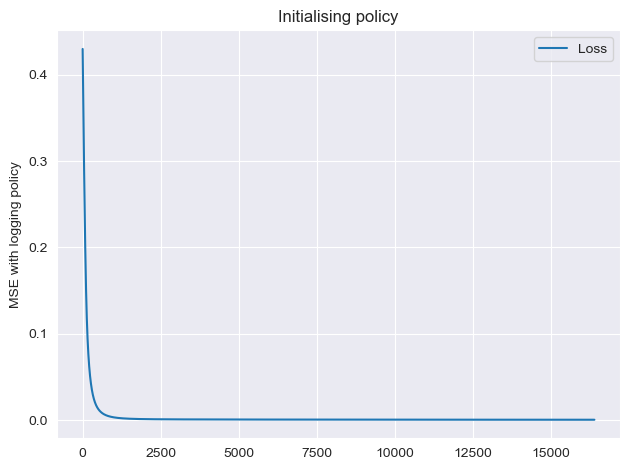

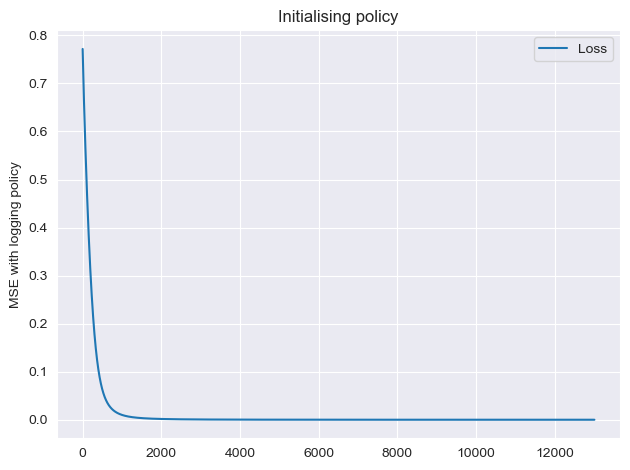

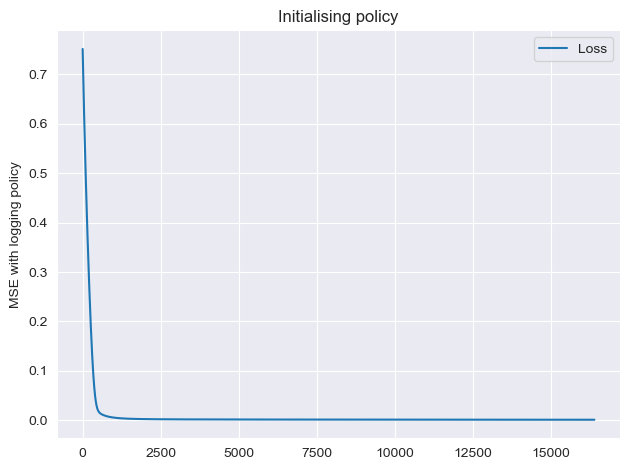

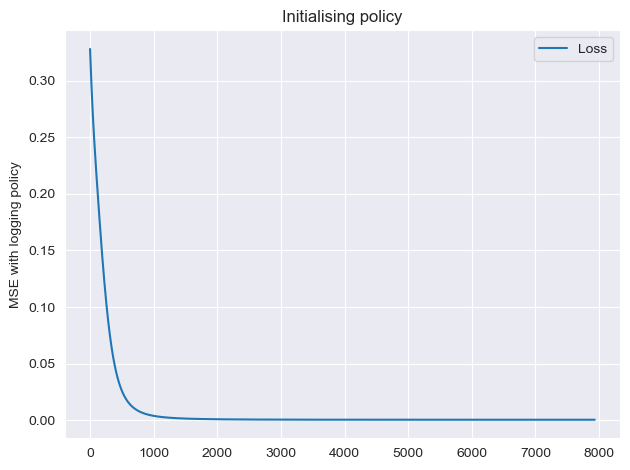

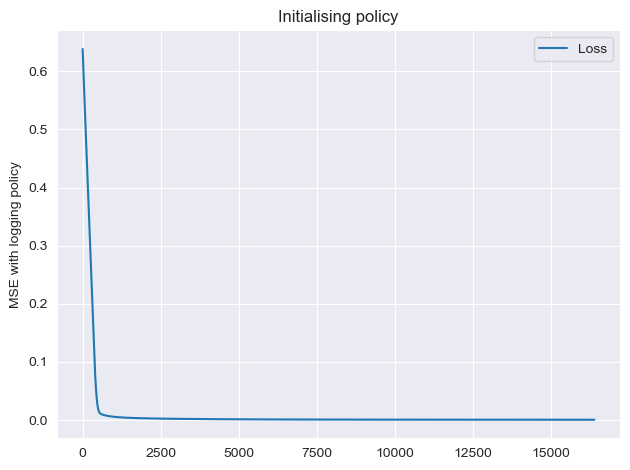

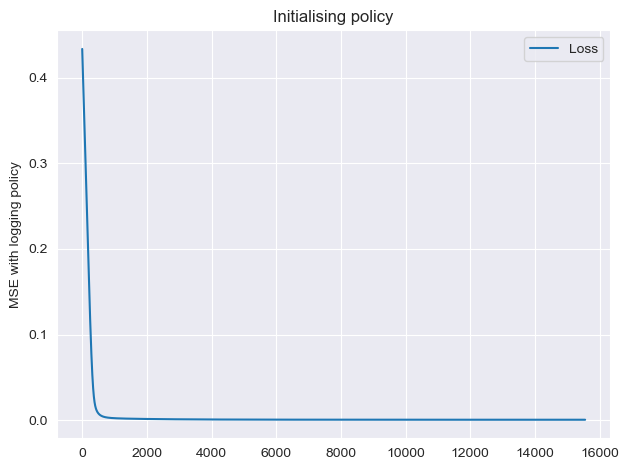

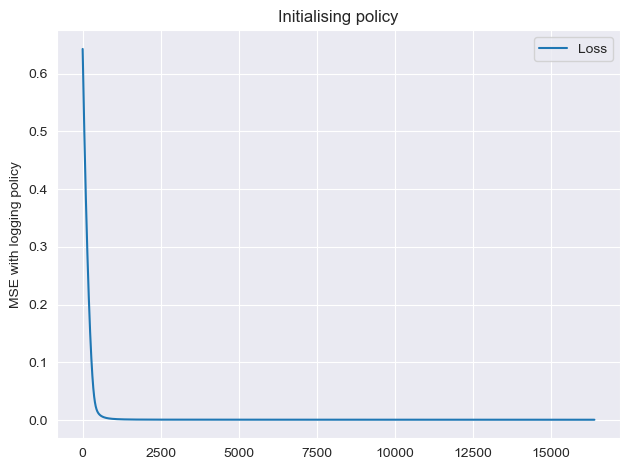

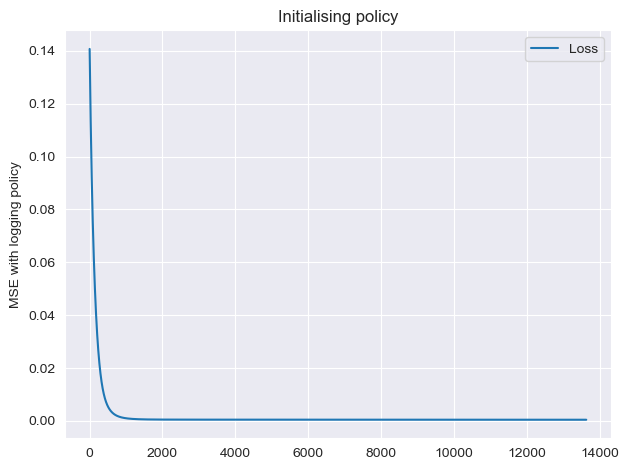

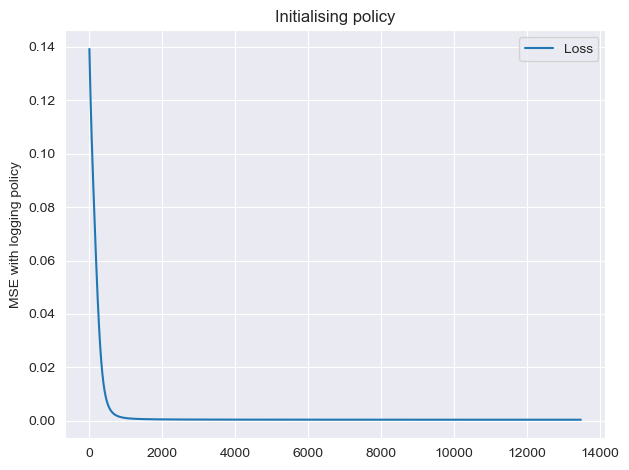

In [65]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

In [66]:
# data generation
# just take the first agent's data (dont know is it correct)
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'test':{}}


num_data = [80000, 20000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# Save Data

In [ ]:
data_dir = f"../data_{estimator}_{competition}_skewed/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [ ]:
from split_data import split_data

In [ ]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir='/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L_skewed/', specical='skewed')

In [67]:
def gridSearch(model, param_grid, input_data, output_data):
    grid_cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1).fit(input_data, output_data)
    print("Param for GS", grid_cv.best_params_)
    print("CV score for GS", grid_cv.best_score_)
    return grid_cv.best_estimator_

In [68]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}
model = tree.DecisionTreeRegressor()
# should I set random state here?
# mb k-fold is not nesscary here
# input_data = np.hstack((trained_data[0][:, :5], trained_data[0][:, 5].reshape(-1, 1)))

In [69]:
# context with bid
context_bid_estimators = {}
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators[agent_id] = best_estimator

# cv fault is 5

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.725888355786586
Test R2 score: 0.729492060084131
Train MSE:  0.003660512958735753
Test MSE:  0.005288416177340692
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.591904038823954
Test R2 score: 0.6010374891367917
Train MSE:  0.005443142625208613
Test MSE:  0.007804934783958457
Agent 2
Param for GS {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.8911829555844418
Test R2 score: 0.9021707879035921
Train MSE:  0.0063193067024428975
Test MSE:  0.01021224252816104
Agent 3
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.2548977379032185
Test R2 score: 0.26658369868037646
Train MSE:  0.010161243276218609
Test MSE:  0.01154165307545106
Agent 4
Param for GS {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10}
CV score for GS 0.00064521404627

In [79]:
offline_data['test'][6][:14]

array([[-2.8298437900058264, 0.6397605254969638, -0.3510527745405323,
        -0.16763366214612788, 1.0, 0.035322364419698715,
        0.9466370096897234, 0.019301435607001198, tensor([0.5772]),
        0.1678338078333686, 1.3070047629506374, 0.0, False, 0, 0.0],
       [1.1581780387740128, -1.547484209080013, -0.9169666104182798,
        -0.39998380461251537, 1.0, 0.6969162225723267,
        0.6808817681397195, 0.25445819543102244, tensor([0.5362]),
        0.05165176584123746, 0.9598498992321528, 0.0, False, 0, 0.0],
       [0.9753897542945278, -1.282313115409348, 1.2615199369153984,
        -0.4013784483075221, 1.0, 0.12404979020357132, 1.063538287028879,
        0.0765668121321243, tensor([0.5804]), 0.006673241321564244,
        0.6717020247544772, 0.0, False, 0, 0.0],
       [0.0945737575209949, -1.0950756792326328, -0.15679882128942357,
        0.8980920204926935, 1.0, 0.4240855574607849, 1.049509990427599,
        0.23552242884002342, tensor([0.5292]), 0.11593459289210285,
     

In [75]:
np.count_nonzero(offline_data['test'][6][:, 14])

84

In [10]:
# context with gamma
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, :5]
    label_train_data = trained_data[agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, :5]
    label_test_data = test_data[agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.10931191270133933
Test R2 score: 0.18498440495961244
Train MSE:  0.00024084850037273936
Test MSE:  0.00027705017893285566
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
CV score for GS 0.33053575325059953
Test R2 score: 0.2907703094884655
Train MSE:  0.001859758009916586
Test MSE:  0.0022085945662352136
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0
Agent 3
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.6479159624934215
Test R2 score: 0.6320353296426195
Train MSE:  0.0010430861636455749
Test MSE:  0.0017394180491209737
Agent 4
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 20}
CV score for GS 0.33912700095153286
Test R2 score: 0.4193234624710217
Train MSE:  8.90

In [11]:
# estimated_CTR and value with bid
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, 5:7]
    label_train_data = trained_data[agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, 5:7]
    label_test_data = test_data[agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.9988509718564229
Test R2 score: 0.999087904342793
Train MSE:  9.753688427456076e-06
Test MSE:  2.198509631181323e-05
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9990265575233621
Test R2 score: 0.9989419553765981
Train MSE:  5.55840520764875e-06
Test MSE:  2.756078834575608e-05
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9997593115893435
Test R2 score: 0.9999506790883373
Train MSE:  7.532009019459726e-20
Test MSE:  3.3127993313984634e-06
Agent 3
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9988607115157719
Test R2 score: 0.9985895883030934
Train MSE:  9.169156121918624e-06
Test MSE:  7.103060019171279e-05
Agent 4
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.99832062

In [14]:
# estimated_CTR and value with gamma
for agent_id in trained_data.keys():
    input_train_data = trained_data[agent_id][:, 5:7]
    label_train_data = trained_data[agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = test_data[agent_id][:, 5:7]
    label_test_data = test_data[agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.5333169841838611
Test R2 score: 0.5105262410898854
Train MSE:  0.00013613352754425153
Test MSE:  0.0001663879725912051
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.962009085796303
Test R2 score: 0.9586889431602974
Train MSE:  8.976011500819029e-05
Test MSE:  0.00012864573618709405
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0
Agent 3
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9718875101456502
Test R2 score: 0.9740680452867054
Train MSE:  9.745089426642302e-05
Test MSE:  0.00012258380684613876
Agent 4
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.6373886469247644
Test R2 score: 0.673742818431487
Train MSE:  6.60777999

In [29]:
agent_id = 3
input_train_data = trained_data[agent_id][:, 5:7]
label_train_data = trained_data[agent_id][:, 8]
print("Agent", agent_id)
best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
input_test_data = test_data[agent_id][:, 5:7]
label_test_data = test_data[agent_id][:, 8]
print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

train_preds = best_estimator.predict(input_train_data)
test_preds =best_estimator.predict(input_test_data)
print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 3
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9718875101456502
Test R2 score: 0.9740680452867054
Train MSE:  9.745089426642302e-05
Test MSE:  0.00012258380684613876


In [30]:
label_train_data

array([0.6571148 , 0.84637403, 0.73560059, ..., 0.84218544, 0.74103725,
       0.82448155])

In [22]:
label_train_data

array([1.        , 1.        , 0.29414657, ..., 0.        , 0.        ,
       1.        ])

In [23]:
train_preds

array([0.56458396, 0.63327402, 0.56458396, ..., 0.56458396, 0.57492661,
       0.63327402])

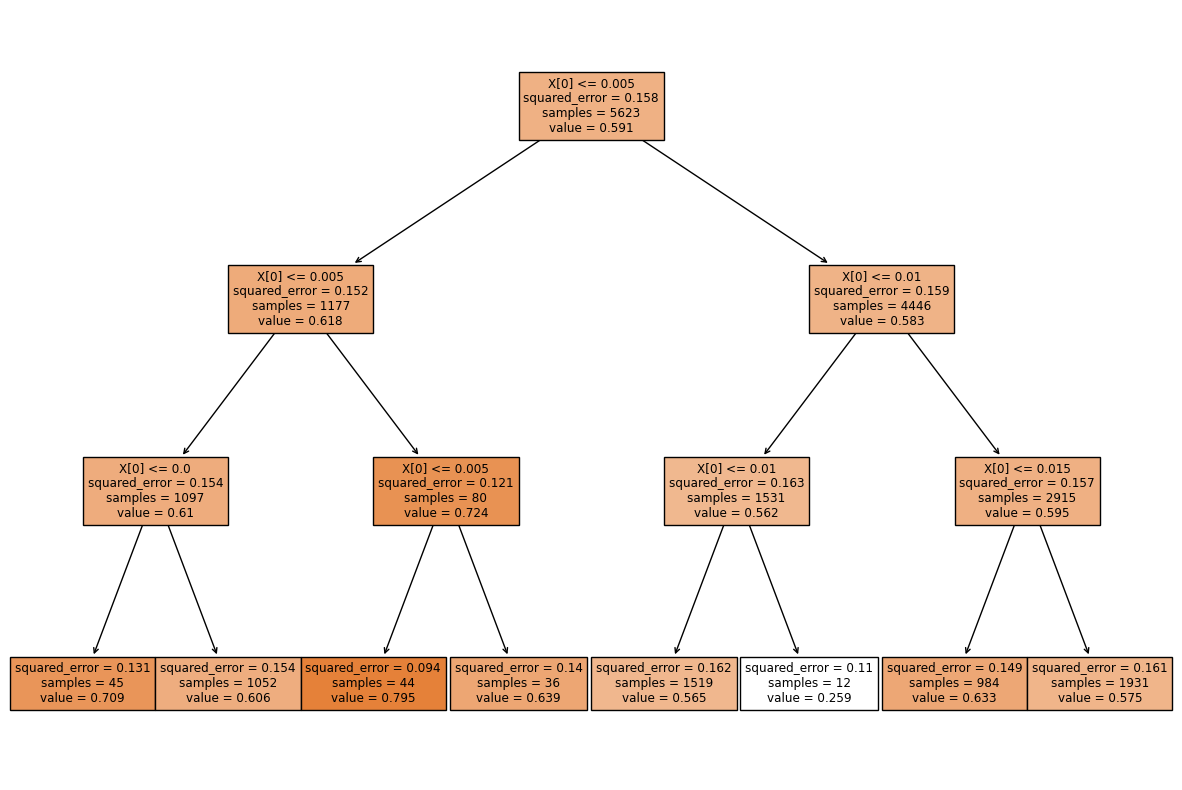

In [24]:
# plot the tree
plt.figure(figsize=(15,10))  # Set the figure size (optional)
tree.plot_tree(best_estimator, filled=True, max_depth=3)
plt.show()